## Introducción <a id='intro'></a>
### Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

 Para estos dos datasets ahora necesitas

importar los archivos
estudiar los datos que contienen
asegurarte de que los tipos de datos sean correctos
- identificar los 10 principales barrios en términos de finalización del recorrido
- hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
sacar conclusiones basadas en cada gráfico y explicar los resultados

## Descripción de los datos
Abre los datos y examínalos.

1. Leer los archivos de datos
    importar librerías de pandas para crear graficas
    importar librerías de pandas 
    Leer el conjunto de datos utilizamos pd.read_csv    
2. Verificar info del DataFrame 
    utlizamos head() para mostrar información del DataFrame

## Inicialización e importación de librerias <a id='intro'></a>

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
from scipy import stats as st

sns.set_theme()

### Cargar datasets

In [2]:
company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_average = pd.read_csv('/datasets/project_sql_result_04.csv')
weather_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

### Exploración inicial de datos

In [3]:
company_trips.info()
company_trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
company_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


## Prepara los datos  <a id='intro'></a>
### Convierte los datos en los tipos necesarios.
- Verifica y corrige los tipos de datos con dtype() 
- Identifica y completa valores ausentes con isna() sum()
- Identifica y elimina los valores duplicados duplicated()  

In [5]:
type(company_trips)

pandas.core.frame.DataFrame

In [6]:
# Identificamos tipos de datos
company_trips.dtypes

company_name    object
trips_amount     int64
dtype: object

In [7]:
# Buscamos valores ausentes y los sumamos
company_trips.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [8]:
# Contar duplicados explícitos
company_trips.duplicated().sum()

0

In [9]:
# verificamos que los nombres esten bien escritos
# Utilizamos sorted para organizar alfabeticamente
sorted(company_trips['company_name'].unique()) 

['0118 - 42111 Godfrey S. Awir',
 '1085 - 72312 N and W Cab Co',
 '1469 - 64126 Omar Jada',
 '2092 - 61288 Sbeih Company',
 '2192 - 73487 Zeymane Corp',
 '2241 - 44667 - Felman Corp',
 '24 Seven Taxi',
 '2733 - 74600 Benny Jona',
 '2809 - 95474 C & D Cab Co Inc.',
 '2823 - 73307 Lee Express Inc',
 '3011 - 66308 JBL Cab Inc.',
 '303 Taxi',
 '3556 - 36214 RC Andrews Cab',
 '3591 - 63480 Chuks Cab',
 '3620 - 52292 David K. Cab Corp.',
 '3623 - 72222 Arrington Enterprises',
 '3721 - Santamaria Express',
 '4053 - 40193 Adwar H. Nikola',
 '4615 - 83503 Tyrone Henderson',
 '4623 - 27290 Jay Kim',
 '5 Star Taxi',
 '5006 - 39261 Salifu Bawa',
 '5062 - 34841 Sam Mestas',
 '5074 - 54002 Ahzmi Inc',
 '5874 - 73628 Sergey Cab Corp.',
 '5997 - 65283 AW Services Inc.',
 '6057 - 24657 Richard Addo',
 '6574 - Babylon Express Inc.',
 '6742 - 83735 Tasha Ride Inc',
 '6743 - 78771 Luhak Corp',
 'American United',
 'American United Taxi Affiliation',
 'Blue Diamond',
 'Blue Ribbon Taxi Association Inc.',
 

In [10]:
dropoff_average.info()
dropoff_average.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [11]:
dropoff_average.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [12]:
type(dropoff_average)

pandas.core.frame.DataFrame

In [13]:
# Identificamos tipos de datos
dropoff_average.dtypes

dropoff_location_name     object
average_trips            float64
dtype: object

In [14]:
# Buscamos valores ausentes y los sumamos
dropoff_average.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [15]:
# Contar duplicados explícitos
dropoff_average.duplicated().sum()

0

In [16]:
# verificamos que los nombres esten bien escritos
# Utilizamos sorted para organizar alfabeticamente
sorted(dropoff_average['dropoff_location_name'].unique()) 

['Albany Park',
 'Andersonville',
 'Archer Heights',
 'Armour Square',
 'Ashburn',
 'Auburn Gresham',
 'Austin',
 'Avalon Park',
 'Avondale',
 'Belmont Cragin',
 'Beverly',
 'Boystown',
 'Bridgeport',
 'Brighton Park',
 'Bucktown',
 'Burnside',
 'Calumet Heights',
 'Chatham',
 'Chicago Lawn',
 'Chinatown',
 'Clearing',
 'Douglas',
 'Dunning',
 'East Side',
 'East Village',
 'Edgewater',
 'Edison Park',
 'Englewood',
 'Fuller Park',
 'Gage Park',
 'Garfield Park',
 'Garfield Ridge',
 'Gold Coast',
 'Grand Boulevard',
 'Grand Crossing',
 'Grant Park',
 'Hegewisch',
 'Hermosa',
 'Humboldt Park',
 'Hyde Park',
 'Irving Park',
 'Jackson Park',
 'Jefferson Park',
 'Kenwood',
 'Lake View',
 'Lincoln Park',
 'Lincoln Square',
 'Little Italy, UIC',
 'Little Village',
 'Logan Square',
 'Loop',
 'Lower West Side',
 'Mckinley Park',
 'Montclare',
 'Morgan Park',
 'Mount Greenwood',
 'Museum Campus',
 'Near South Side',
 'New City',
 'North Center',
 'North Lawndale',
 'North Park',
 'Norwood Park'

## Analiza los datos  <a id='intro'></a>
- Creamos graficos para las 10 principales barrios en terminos de finalización del recorrido.
- Identificamos las 10 principales empresas de taxis.

### Calcular e identificar los 10 principales barrios en términos de finalización del recorrido  <a id='intro'></a>

In [17]:
# nombres de los 10 principales barrios
popular_location = (
    dropoff_average
    .groupby(["dropoff_location_name"])["average_trips"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

popular_location

Index(['Loop', 'River North', 'Streeterville', 'West Loop', 'O'Hare',
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul'],
      dtype='object', name='dropoff_location_name')

### Creamos los gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones de recorridos.

In [18]:
# nombres con los 10 principales barrios
popular_location = (
    dropoff_average
    .groupby(["dropoff_location_name"])["average_trips"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

popular_location

Index(['Loop', 'River North', 'Streeterville', 'West Loop', 'O'Hare',
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul'],
      dtype='object', name='dropoff_location_name')

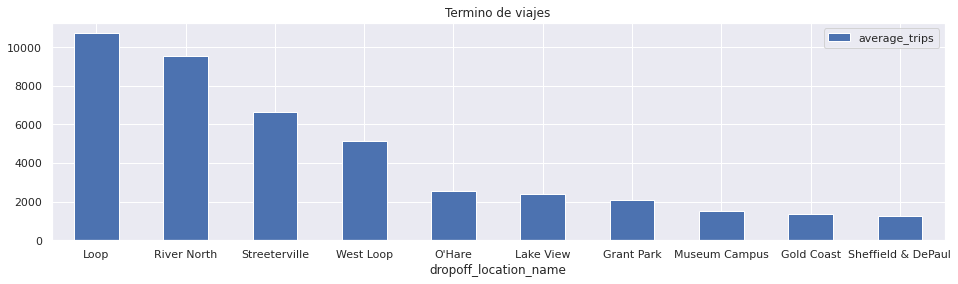

In [19]:
# Crear grafico de barras identificamos los 10 primeros barrios en termino de finalización de recorrido
dropoff_average.head(10).plot(
    kind='bar', 
    figsize= (16,4),
    x= "dropoff_location_name",
    title='Termino de viajes',
    legend= 'Location Name',
    rot=0
)

plt.show()

Conclusión, identificamos los 10 principales barrios en termino de finalización de viajes, el principal barrio es Loop y el menos visitado es Sheffield & DePaul.

### Creamos los gráficos de las 10 principales empresas de taxis.

In [20]:
# nombres con los 10 principales compañias de taxis
popular_companys = (
    company_trips
    .groupby(["company_name"])["trips_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

popular_companys

Index(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.'],
      dtype='object', name='company_name')

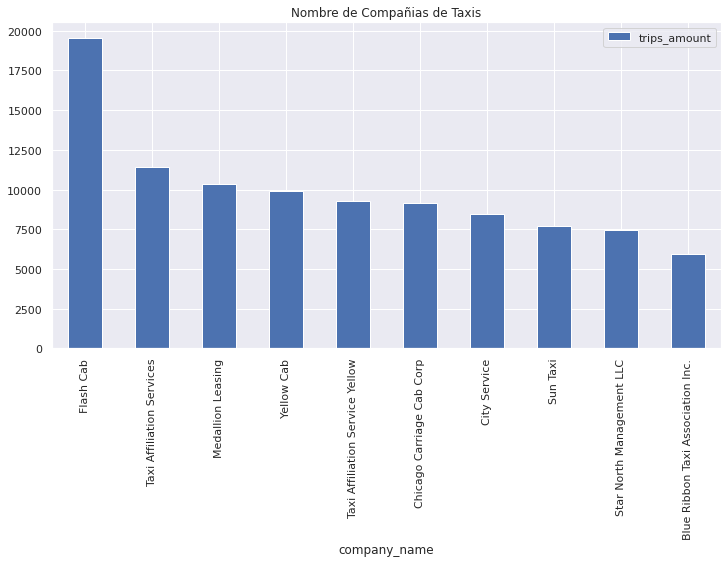

In [21]:
# Crear grafico de barras 10 principales empresas de taxis
company_trips.head(10).plot(
    kind='bar', 
    figsize= (12,6),
    x= "company_name",
    title='Nombre de Compañias de Taxis',
    legend= 'Company Name'
)

plt.show()

Conclusión, identificamos las 10 principales empresas de taxis en terminos de finalización de viajes. La empresa lider es Flash Cab y la menos rentable Blue Ribbon Taxi Association Inc.

## Prueba de hipótesis (Python)  <a id='intro'></a>

/datasets/project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

### Analizamos los datos para los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare.

In [22]:
weather_trips.info()
weather_trips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
weather_trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [24]:
type(weather_trips)

pandas.core.frame.DataFrame

In [25]:
# Analizamos los tipos de datos
weather_trips.dtypes

start_ts               object
weather_conditions     object
duration_seconds      float64
dtype: object

In [26]:
# Buscamos valores ausentes y los sumamos
weather_trips.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [27]:
# Contar duplicados explícitos
weather_trips.duplicated().sum()

197

In [28]:
# filtro general muestra los 197 duplicados
weather_trips[weather_trips.duplicated()] 

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
...,...,...,...
1054,2017-11-11 07:00:00,Good,1380.0
1058,2017-11-25 12:00:00,Good,1440.0
1062,2017-11-11 06:00:00,Good,1500.0
1065,2017-11-11 13:00:00,Good,2100.0


In [29]:
# filtramos por la busqueda de la columna y encontramos 41 duplicados por filas
weather_trips[weather_trips.duration_seconds== 1380.0].count()

start_ts              41
weather_conditions    41
duration_seconds      41
dtype: int64

In [30]:
# Elimina los pedidos duplicados
weather_trips.drop_duplicates(inplace=True) # despues de eliminar reiniciamos 

In [31]:
# actualizar indice
weather_trips.reset_index(drop=True, inplace=True)

In [32]:
# Vuelve a verificar si hay filas duplicadas
weather_trips.duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
'Filtramos por filas el DataFrame y encontramos 41 datos duplicados 
'filtramos por la columna duration_seconds y encontramos datos duplicados en la columna start_ts 
' aplicamos un filtro a la duración de segundos 1380.0 y encontramos que se encuentra duplicado 41 veces 
lo que me lleva a la conclusión de que son los 197 rows filas duplicadas.

In [33]:
# verificamos que los nombres esten bien escritos
# Utilizamos sorted para organizar alfabeticamente
sorted(weather_trips['weather_conditions'].unique()) 

['Bad', 'Good']

In [34]:
weather_trips["weather_conditions"].value_counts()

Good    723
Bad     148
Name: weather_conditions, dtype: int64

### Realizamos una distribución para analizar los datos de "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluvioso

In [35]:
# Realizamos una comparación de las columnas respecto a su promedio
weather_trips.groupby("weather_conditions")["duration_seconds"].mean()

weather_conditions
Bad     2409.229730
Good    2032.253112
Name: duration_seconds, dtype: float64

In [36]:
weather_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


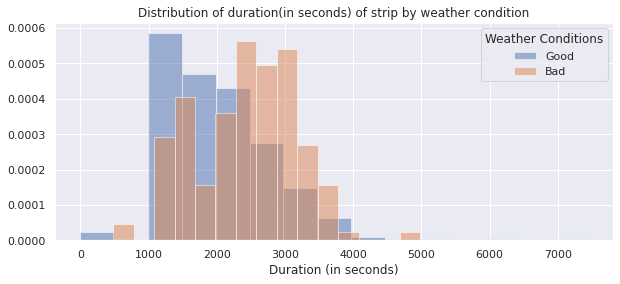

In [37]:
plt.figure(figsize=(10,4))
weather_trips.query("weather_conditions=='Good'")["duration_seconds"].hist(
    label="Good", 
    ax=plt.gca(), #graficamos exactamente el mismo eje para la comparación
    density=True, 
    alpha=0.5,
    bins=15
)
weather_trips.query("weather_conditions=='Bad'")["duration_seconds"].hist(
    label="Bad", 
    ax=plt.gca(), #graficamos exactamente el mismo eje para la comparación
    density=True, 
    alpha=0.5,
    bins=15
)
plt.legend(title="Weather Conditions")
plt.title("Distribution of duration(in seconds) of strip by weather condition")
plt.xlabel("Duration (in seconds)")
plt.show()

Conclusion, la distribución de la duración de los viajes es ligeramente superior cuando las condiciones del clima son malas. 

## Prueba las siguientes hipótesis:

— La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

— Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [38]:
# Prueba las hipótesis 
# st.ttest_ind 

alpha = 0.5

stat, p_value = st.ttest_ind(
    weather_trips.query("weather_conditions == 'Good'")["duration_seconds"],
    weather_trips.query("weather_conditions == 'Bad'")["duration_seconds"],
    equal_var = False
)
print('valor p:', p_value)
if (p_value < alpha):  
       print('Rechazamos la hipótesis nula')
else:
       print("No podemos rechazar la hipótesis nula")

valor p: 9.126383933880083e-08
Rechazamos la hipótesis nula


Rechazamos la Hipotesis nula, ya que el promedio de las condiciones climaticas aumenta ligeramente cuando las condiciones climaticas son malas.

In [39]:
# Prueba las hipótesis

# calculamos el promedio de las condiciones climaticas
print(f"""
{weather_trips.query("weather_conditions == 'Good'")["duration_seconds"].mean()} 
{weather_trips.query("weather_conditions == 'Bad'")["duration_seconds"].mean()} 
""")


2032.253112033195 
2409.2297297297296 



In [40]:
weather_trips["duration_seconds"].max()

7440.0

## Conclusiones
- Se verifican los tipos de datos de la tabla para el analisis del proyecto. 
- Analizamos los tipos de datos con los que vamos a trabajar en nuestro proyecto.
- Mostramos la distribución de los datos en graficos de barras para los viajes y distribucion del promedio de los viajes de los barrios mas populares y menos populares, se realizar comparaciónes y graficos de la duración de los viajes y compañias de taxis.
- Realiazamos la prueba de hipotesis.
- Se realizan conclusiones en cada etapa del analisis.
